In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# 1. Data Wrangling

In [2]:
takehome_user_engagement_df = pd.read_csv('data\\takehome_user_engagement.csv', parse_dates = True)
takehome_user_engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
takehome_user_engagement_df.shape

(207917, 3)

In [4]:
takehome_user_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
engagement_df = takehome_user_engagement_df.drop('time_stamp', axis = 1).\
                                        assign(date=pd.to_datetime(takehome_user_engagement_df.time_stamp).dt.date)
engagement_df.head()

,user_id,visited,date
0,1,1,2014-04-22
1,2,1,2013-11-15
2,2,1,2013-11-29
3,2,1,2013-12-09
4,2,1,2013-12-25


In [6]:
engagement_df['visited'].unique()

array([1], dtype=int64)

In [7]:
# check whether a user login multiple times on the same date
engagement_df.groupby(['user_id', 'date'])['visited'].sum().sort_values(ascending = False).head()

user_id  date      
1        2014-04-22    1
7926     2013-11-16    1
         2013-11-05    1
         2013-11-06    1
         2013-11-07    1
Name: visited, dtype: int64

In [8]:
engagement_df = engagement_df.sort_values(by = ['user_id', 'date'])
engagement_df.head(20)

,user_id,visited,date
0,1,1,2014-04-22
1,2,1,2013-11-15
2,2,1,2013-11-29
3,2,1,2013-12-09
4,2,1,2013-12-25
5,2,1,2013-12-31
6,2,1,2014-01-08
7,2,1,2014-02-03
8,2,1,2014-02-08
9,2,1,2014-02-09


In [9]:
# add a column 'days' to store day difference between each login date and the previuse two login date in engagement_df
engagement_df = engagement_df.drop('visited', axis=1).assign(days = engagement_df.groupby('user_id')['date'].diff(2))
engagement_df.head()

,user_id,date,days
0,1,2014-04-22,NaN
1,2,2013-11-15,NaT
2,2,2013-11-29,NaT
3,2,2013-12-09,24 days 00:00:00
4,2,2013-12-25,26 days 00:00:00


In [10]:
# add a column 'adopted_user' into engagement_df based on the values in 'days' column
from datetime import timedelta
engagement_df = engagement_df.assign(adopted_user = np.where(engagement_df.days <= timedelta(days=7), 1, 0))
engagement_df.head(20)

,user_id,date,days,adopted_user
0,1,2014-04-22,NaN,0
1,2,2013-11-15,NaT,0
2,2,2013-11-29,NaT,0
3,2,2013-12-09,24 days 00:00:00,0
4,2,2013-12-25,26 days 00:00:00,0
5,2,2013-12-31,22 days 00:00:00,0
6,2,2014-01-08,14 days 00:00:00,0
7,2,2014-02-03,34 days 00:00:00,0
8,2,2014-02-08,31 days 00:00:00,0
9,2,2014-02-09,6 days 00:00:00,1


In [11]:
adopted_user_ser = engagement_df.groupby('user_id')['adopted_user'].sum()
adopted_user_ser.head(10)

user_id
1       0
2       3
3       0
4       0
5       0
6       0
7       0
10    267
11      0
13      0
Name: adopted_user, dtype: int32

In [12]:
adopted_user_list = list(adopted_user_ser[adopted_user_ser>0].index)
adopted_user_list[:5]

[2, 10, 20, 33, 42]

In [13]:
takehome_users_df = pd.read_csv('data\\takehome_users.csv', encoding = 'latin-1', parse_dates = True)
takehome_users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [14]:
takehome_users_df.shape

(12000, 10)

In [15]:
takehome_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [16]:
takehome_users_df.nunique()

object_id                     12000
creation_time                 11996
name                          11355
email                         11980
creation_source                   5
last_session_creation_time     8821
opted_in_to_mailing_list          2
enabled_for_marketing_drip        2
org_id                          417
invited_by_user_id             2564
dtype: int64

In [17]:
# remove orig_id
takehome_users_df.drop('org_id', axis=1, inplace = True)
takehome_users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,5240.0


In [18]:
# rename object_id to user_id
takehome_users_df.rename(columns = {'object_id':'user_id'}, inplace = True)
takehome_users_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,5240.0


In [19]:
# count users with same name but different user_id
takehome_users_df.groupby(['name'])['user_id'].count().sort_values(ascending = False).head()

name
Cavalcanti Victor    5
Araujo Gabriela      5
Carvalho Bruna       4
Costa Alice          4
Souza Alice          4
Name: user_id, dtype: int64

In [20]:
# check rows with name Cavalcanti Victor
takehome_users_df[takehome_users_df['name']=='Cavalcanti Victor']

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id
1949,1950,2012-08-05 12:12:05,Cavalcanti Victor,otbceqtu@rcktp.com,PERSONAL_PROJECTS,NaN,1,0,NaN
4777,4778,2013-03-05 17:02:19,Cavalcanti Victor,VictorCostaCavalcanti@gmail.com,ORG_INVITE,1.374513e+09,0,0,4113.0
8220,8221,2012-11-14 23:45:11,Cavalcanti Victor,VictorSilvaCavalcanti@gmail.com,SIGNUP_GOOGLE_AUTH,1.401321e+09,0,0,NaN
8596,8597,2014-02-09 05:17:26,Cavalcanti Victor,VictorPereiraCavalcanti@yahoo.com,GUEST_INVITE,1.392096e+09,0,0,9562.0
10915,10916,2012-12-06 19:20:47,Cavalcanti Victor,VictorFerreiraCavalcanti@gustr.com,PERSONAL_PROJECTS,1.356895e+09,1,0,NaN


In [21]:
# count users with same name and creation time but different user_id 
(takehome_users_df.groupby(['name', 'creation_time'])['user_id'].count()>1).sum()

0

In [22]:
# count users with same name and creation time but different email
(takehome_users_df.groupby(['name', 'creation_time'])['email'].count()>1).sum()

0

In [23]:
# create a new column invited_by_user based on invited_by_user_id 
users_df = takehome_users_df.drop(columns=['invited_by_user_id', 'email'], axis=1).\
                                            assign(invited_by_user = np.where(takehome_users_df.invited_by_user_id.isna(), 0, 1))
users_df.head()                                               

,user_id,creation_time,name,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user
0,1,2014-04-22 03:53:30,Clausen August,GUEST_INVITE,1.398139e+09,1,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,ORG_INVITE,1.396238e+09,0,0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,ORG_INVITE,1.363735e+09,0,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,GUEST_INVITE,1.369210e+09,0,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GUEST_INVITE,1.358850e+09,0,0,1


In [24]:
# add a new column 'adopted_user' to store whether the user is adopted information
users_df = users_df.assign(adopted_user = np.where(users_df['user_id'].isin(adopted_user_list), 1, 0))
users_df.head(20)

,user_id,creation_time,name,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,GUEST_INVITE,1.398139e+09,1,0,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,ORG_INVITE,1.396238e+09,0,0,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,ORG_INVITE,1.363735e+09,0,0,1,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,GUEST_INVITE,1.369210e+09,0,0,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GUEST_INVITE,1.358850e+09,0,0,1,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,GUEST_INVITE,1.387424e+09,0,0,1,0
6,7,2012-12-16 13:24:32,Sewell Tyler,SIGNUP,1.356010e+09,0,1,0,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,PERSONAL_PROJECTS,NaN,1,1,0,0
8,9,2013-11-05 04:04:24,Amsel Paul,PERSONAL_PROJECTS,NaN,0,0,0,0
9,10,2013-01-16 22:08:03,Santos Carla,ORG_INVITE,1.401833e+09,1,1,1,1


In [25]:
# number of users with null last_session_creation_time
users_df[users_df.last_session_creation_time.isnull()].shape[0]

3177

In [26]:
#conver 'creation_time' to datetime type
users_df['creation_time'] = pd.to_datetime(users_df['creation_time'], format='%Y-%m-%d %H:%M:%S')
# convert 'last_session_creation_time' from unix timestamp to datetime
users_df['last_session_creation_time'] = pd.to_datetime(users_df['last_session_creation_time'], unit='s')
# create a new column 'usage_history' to store the number of days between account creation and last use
users_df['usage_history'] = (users_df['last_session_creation_time'] - users_df['creation_time']).dt.days
users_df.head()

,user_id,creation_time,name,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user,adopted_user,usage_history
0,1,2014-04-22 03:53:30,Clausen August,GUEST_INVITE,2014-04-22 03:53:30,1,0,1,0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,ORG_INVITE,2014-03-31 03:45:04,0,0,1,1,136.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,ORG_INVITE,2013-03-19 23:14:52,0,0,1,0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GUEST_INVITE,2013-01-22 10:14:20,0,0,1,0,5.0


In [27]:
users_df.index[(users_df['usage_history'].isna()) & (users_df['adopted_user']==1)].to_list()

[]

In [28]:
users_df.index[(users_df['usage_history']==0) & (users_df['adopted_user']==1)].to_list()

[]

In [29]:
len(users_df.index[(users_df['usage_history']>0) & (users_df['adopted_user']==1)].to_list())

1656

In [30]:
users_df['adopted_user'].sum()

1656

Observation: all the users with null usage_history are not adopted users and all the adopted usres have usage_history > 0

In [31]:
# based on the observation, I decided to impute nan with 0 in usage_history column
users_df['usage_history']=np.where(users_df['usage_history'].isnull(), 0, users_df['usage_history'])
users_df[users_df['usage_history'].isnull()].shape

(0, 10)

In [32]:
users_df.columns

Index(['user_id', 'creation_time', 'name', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'invited_by_user', 'adopted_user',
       'usage_history'],
      dtype='object')

# 2. Data Exploratory Analysis

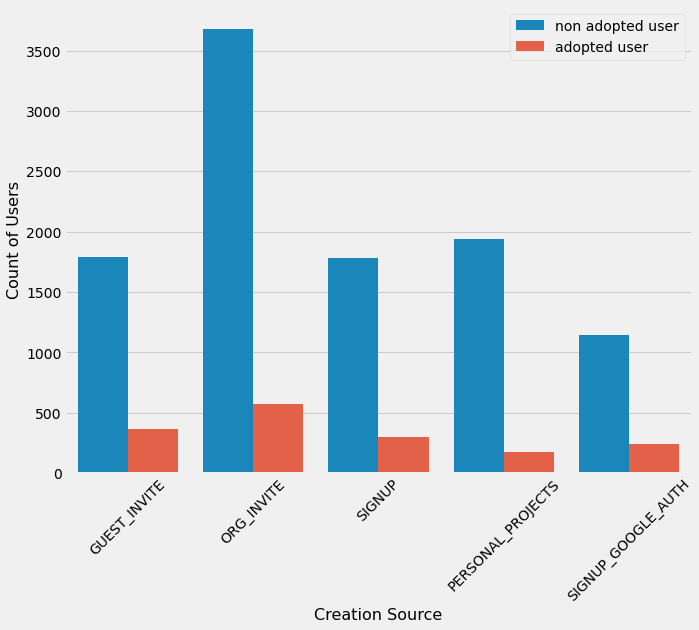

In [33]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'creation_source', data = users_df, hue = 'adopted_user')
plt.xticks(rotation=45)
plt.xlabel('Creation Source', fontsize = 16)
plt.ylabel('Count of Users', fontsize = 16)
plt.legend(['non adopted user', 'adopted user'])
plt.show()

In [34]:
# adopted user rates by creation_source
adopted_user_rate_by_creation_source = users_df[users_df.adopted_user == 1].groupby('creation_source')['adopted_user'].count() \
                        /users_df.groupby('creation_source')['adopted_user'].count()
print(adopted_user_rate_by_creation_source.apply(lambda x: str(round(x*100, 2))+'%'))

creation_source
GUEST_INVITE          17.06%
ORG_INVITE            13.49%
PERSONAL_PROJECTS      8.15%
SIGNUP                14.47%
SIGNUP_GOOGLE_AUTH    17.26%
Name: adopted_user, dtype: object


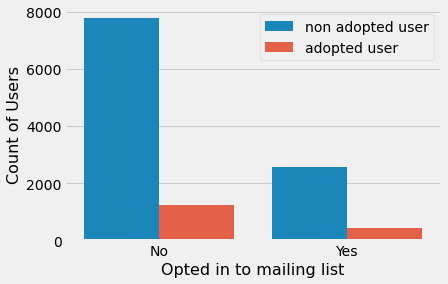

In [35]:
sns.countplot(x = 'opted_in_to_mailing_list', data = users_df, hue = 'adopted_user')
plt.xticks([0,1], ['No', 'Yes'])
plt.xlabel('Opted in to mailing list', fontsize = 16)
plt.ylabel('Count of Users', fontsize = 16)
plt.legend(['non adopted user', 'adopted user'])
plt.show()

In [36]:
# adopted user rates by opted_in_to_mailing_list
adopted_user_rate_by_opted_in_to_mailing_list = users_df[users_df.adopted_user == 1].groupby('opted_in_to_mailing_list')['adopted_user'].count() \
                        /users_df.groupby('opted_in_to_mailing_list')['adopted_user'].count()
print(adopted_user_rate_by_opted_in_to_mailing_list.apply(lambda x: str(round(x*100, 2))+'%'))

opted_in_to_mailing_list
0    13.62%
1    14.33%
Name: adopted_user, dtype: object


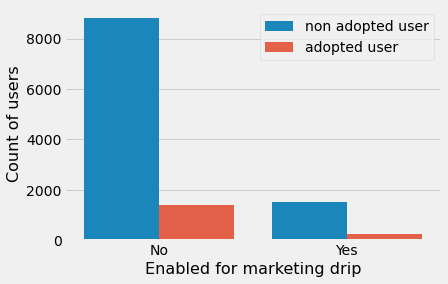

In [37]:
sns.countplot(x = 'enabled_for_marketing_drip', data = users_df, hue = 'adopted_user')
plt.xticks([0,1], ['No', 'Yes'])
plt.xlabel('Enabled for marketing drip', fontsize = 16)
plt.ylabel('Count of users', fontsize = 16)
plt.legend(['non adopted user', 'adopted user'])
plt.show()

In [38]:
# adopted user rates by enabled_for_marketing_drip
adopted_user_rate_by_enabled_for_marketing_drip = users_df[users_df.adopted_user == 1].groupby('enabled_for_marketing_drip')['adopted_user'].count() \
                        /users_df.groupby('enabled_for_marketing_drip')['adopted_user'].count()
print(adopted_user_rate_by_enabled_for_marketing_drip.apply(lambda x: str(round(x*100, 2))+'%'))

enabled_for_marketing_drip
0     13.7%
1    14.34%
Name: adopted_user, dtype: object


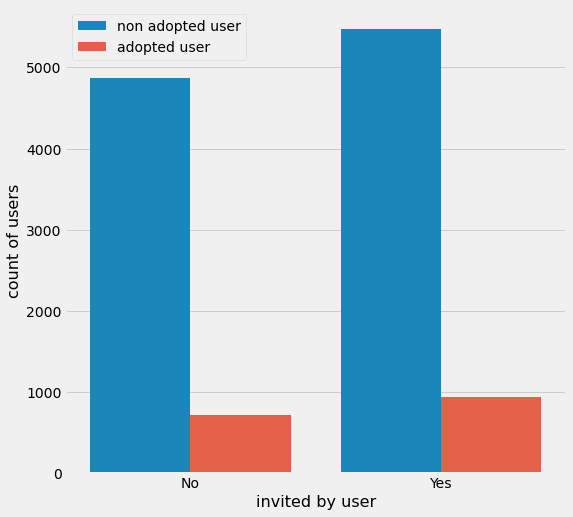

In [39]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'invited_by_user', data = users_df, hue = 'adopted_user')
plt.xticks([0,1], ['No', 'Yes'])
plt.xlabel('invited by user', fontsize = 16)
plt.ylabel('count of users', fontsize = 16)
plt.legend(['non adopted user', 'adopted user'])
plt.show()

In [40]:
# adopted user rates by invited_by_user
adopted_user_rate_by_invited_by_user= users_df[users_df.adopted_user == 1].groupby('invited_by_user')['adopted_user'].count() \
                        /users_df.groupby('invited_by_user')['adopted_user'].count()
print(adopted_user_rate_by_enabled_for_marketing_drip.apply(lambda x: str(round(x*100, 2))+'%'))

enabled_for_marketing_drip
0     13.7%
1    14.34%
Name: adopted_user, dtype: object


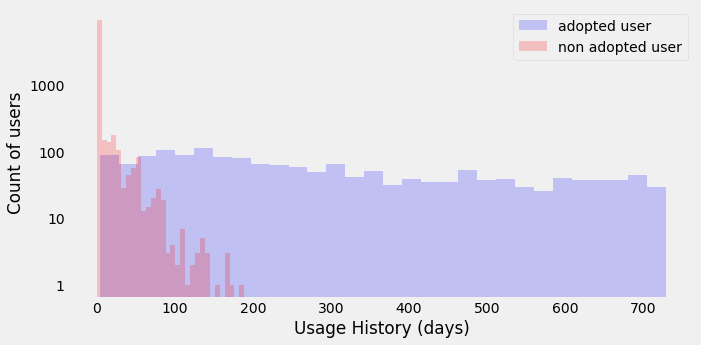

In [41]:
plt.figure(figsize = (10, 5))
plt.hist(users_df.loc[users_df['adopted_user']==1, 'usage_history'], bins=30, alpha=0.2, color='b', label='adopted user')
plt.hist(users_df.loc[users_df['adopted_user']==0, 'usage_history'], bins=30, alpha=0.2, color='r', label='non adopted user')
plt.yscale('log')
plt.legend()
plt.xlabel('Usage History (days)')
plt.ylabel('Count of users')
plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])
plt.grid()
plt.show()

# Observation: the longer the user's usage history is, the more likely the user will become an adopted user

# 3. Pre-Processing

In [42]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(users_df.drop(['user_id', 'creation_time', 'name', 'adopted_user', 'last_session_creation_time'], axis = 1))
y = users_df['adopted_user']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

# 4. Modeling

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [44]:
#tune n_estimators
clf = RandomForestClassifier(random_state=123, class_weight = 'balanced')
params = {'n_estimators':[10, 50, 100, 150, 200]}
model = GridSearchCV(clf, params)
model.fit(X_train, y_train)
print('the best n_estimator is: ', model.best_params_)
print('the best score is: ', model.best_score_)

the best n_estimator is:  {'n_estimators': 10}
the best score is:  0.9584523809523811


In [45]:
rf_clf = RandomForestClassifier(n_estimators = 10, random_state=123)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print('The Accuracy Score is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

The Accuracy Score is:  0.9680555555555556
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3065
           1       0.90      0.89      0.89       535

    accuracy                           0.97      3600
   macro avg       0.94      0.93      0.94      3600
weighted avg       0.97      0.97      0.97      3600



In [46]:
confusion_matrix(y_test, y_pred)

array([[3011,   54],
       [  61,  474]], dtype=int64)

In [47]:
# feature importance
feature_importance = pd.Series(rf_clf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False)

usage_history                         0.978333
creation_source_PERSONAL_PROJECTS     0.005467
opted_in_to_mailing_list              0.004694
enabled_for_marketing_drip            0.004357
creation_source_SIGNUP_GOOGLE_AUTH    0.001917
creation_source_GUEST_INVITE          0.001659
creation_source_ORG_INVITE            0.001339
creation_source_SIGNUP                0.001140
invited_by_user                       0.001094
dtype: float64

Conclusion: usage_lenghth is the most important feature to predict future user adoption